## Final Project Submission

Please fill out:
* Student name: Eric Sundstrom
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# OSEMN Data Science Process

# Obtain Data

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Business Understanding:

Our goal is to predict the sale price of houses using the other variables provided in the data set as columns
We will be using a multivariable linear regression model
This notebook is for technical audiences

# Scrub

Is the dataset really large?  Do we need a subsample to make things easier and faster for now?

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It doesn't look too big, much smaller than the Walmart data-set we dealt with in the labs.  I'm going to wait to see if I run into long runtimes with the full dataset before deciding if I need to take a subsample

# Dealing with Datatypes:

thankfully we're dealing with mostly numbers
the date is coded as a string (object)
sqft_basement is supposed to be a number but is coded as a string; must be changed
waterfront is probably a dummy variable
there could be some other candidates for transforming the numbers to categorical variables

There was an error when I tried to convert sqft_basement to float. There is a question mark value that is causing the error.  Maybe we can convert to float as intended if we transform the ? data to something that can be transformed to a number

In [377]:
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [378]:
df[df['sqft_basement'] == '?'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656


The other data for rows where sqft_basement is ? seem to be valid data so we can't just disregard those rows.
We can't assume ? was used for those without a basement because we don't know.  Can't change ? to 0s because we don't know what the data already stored as 0 truly means.  Let's change it to another number like 0 so we know we have this ? data but stored as a 1 so we can convert the datatype to float to be able to make graphical use of the non 0 and 1 data points

In [379]:
df.loc[df['sqft_basement'] == '?', ['sqft_basement']] = '1.0'

In [380]:
df.sqft_basement.value_counts().head()

0.0      12826
1.0        454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [381]:
df.sqft_basement = df.sqft_basement.astype('float64')

In [382]:
df.sqft_basement.dtype

dtype('float64')

In [383]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


maybe floors would be better represented as categorical because of the small number of unique possibilities

In [384]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

no, let's keep as is.  with the inclusion of the 1/2 steps there is enough data points to make sense of this as a continuous variable

In [385]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [386]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [387]:
df.waterfront.isna().sum()

2376

waterfront is a dummy variable we need to cast to a string

In [388]:
df.waterfront.dtype

dtype('float64')

In [389]:
df.waterfront = df.waterfront.astype('str')

Okay. Now let's move on to view

In [390]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [391]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

this is a strange variable.  (you would think) it's supposed to be how many times the house has been viewed but it's values only go up to 4.  doesn't really make sense.  Maybe the column was described wrong.  I guess it's just better to keep this column intact and as a continuous variable

we aren't going to change anymore columns to categorical so let's now move on to dealing with null values

only 2 columns have null data: view and yr_renovated

we already saw view is a strange variable, we don't really even know what the non-null values mean, but let's see how many null values there are

In [396]:
df.view.isna().sum()

63

there aren't many null values, the vast majority of this column's values are 0.  often times null and 0 represent the same thing.  I think we should just change the NaN values to 0

In [397]:
df.loc[df.view.isna(), 'view'] = 0.0

In [398]:
df.view.unique()

array([0., 3., 4., 2., 1.])

Okay good, now onto the null values in waterfront

In [399]:
df.waterfront.unique()

array(['nan', '0.0', '1.0'], dtype=object)

In [400]:
df.waterfront.value_counts()

0.0    19075
nan     2376
1.0      146
Name: waterfront, dtype: int64

Now I remember we encountered null (nan) values in the waterfront variable before we converted the whole thing to a string.  Should we transform the null values to 0 since they both easily could represent that the house is not waterfront property?  Or  keep the null values as a separate category for a 3 category dummy variable?

In [401]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [402]:
df.yr_renovated.value_counts().head(10)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_renovated, dtype: int64

In [403]:
df.yr_renovated.isna().sum()

3842

the 0 value is probably already a placeholder for homes that have never been renovated.  17000 rows have a 0 value so we are just going to change the null values to 0, because at the end of the day, if we don't know what year it was renovated then it is of no use to us in this column besides being something other than a year of renovation

In [404]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [405]:
df.yr_renovated.isna().sum()

0

Okay, we have removed all of the (technically) null data from our dataset.  Time for the next step

In [408]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

zipcodes are really more like categories because higher and lower numbers as your zipcode doesn't really mean anything (I don't think).  but a 70 category variable seems like a bad idea

# Explore

Let's check for multi-collinearity between our variables as that would be a big problem for our model

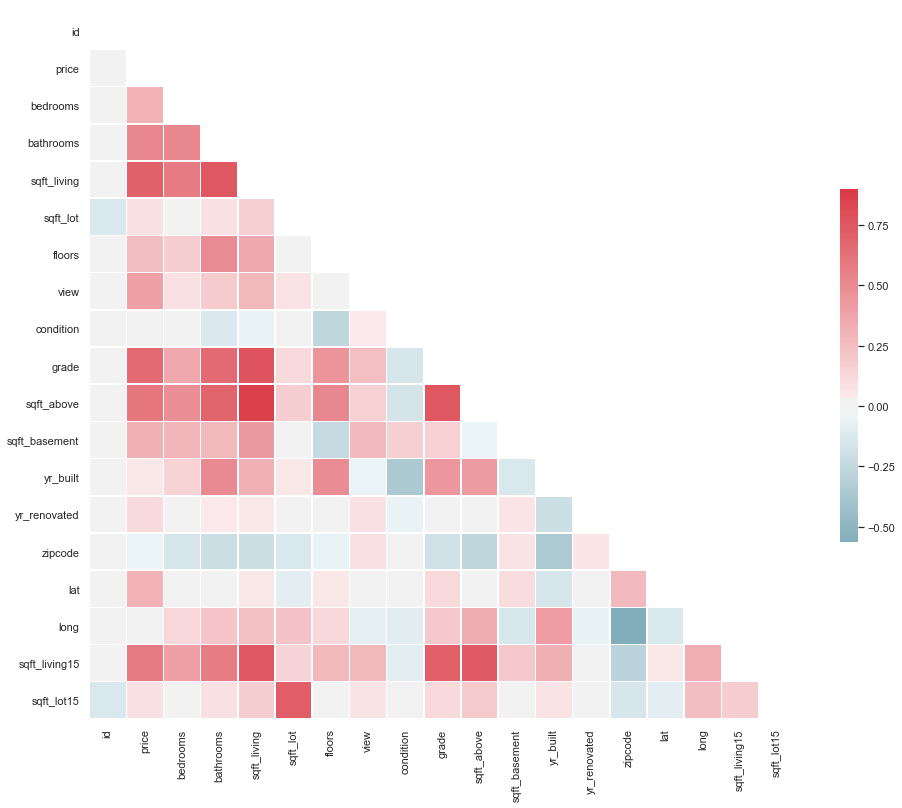

In [409]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [410]:
(abs(df.corr()) > 0.76).sum()

id               1
price            1
bedrooms         1
bathrooms        1
sqft_living      3
sqft_lot         1
floors           1
view             1
condition        1
grade            2
sqft_above       2
sqft_basement    1
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    1
sqft_lot15       1
dtype: int64

In [411]:
(abs(df.corr()) > 0.76)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False


sqft_living
-grade
-sqft_above

All have multicollinearity above .76 (absolute value)

the column sqft_living is highly correlated with both grade and sqft_above.  Given that sqft_above seems like it's capturing similiar info, I think we should remove sqft_living.  I especially didn't want to get rid of grade because I'm interested to include that in the model

In [412]:
df = df.drop('sqft_living', axis=1)

In [414]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,5650,1.0,nan,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# One-Hot
only column to transform is waterfront
but date is also an object and will be treated like a category, not what we want

So I will change the type of the date column from string to a datetime type.  Hopefully that way the get_dummies() method will ignore that column

In [417]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [418]:
df = pd.get_dummies(df)

# Analyze Distributions

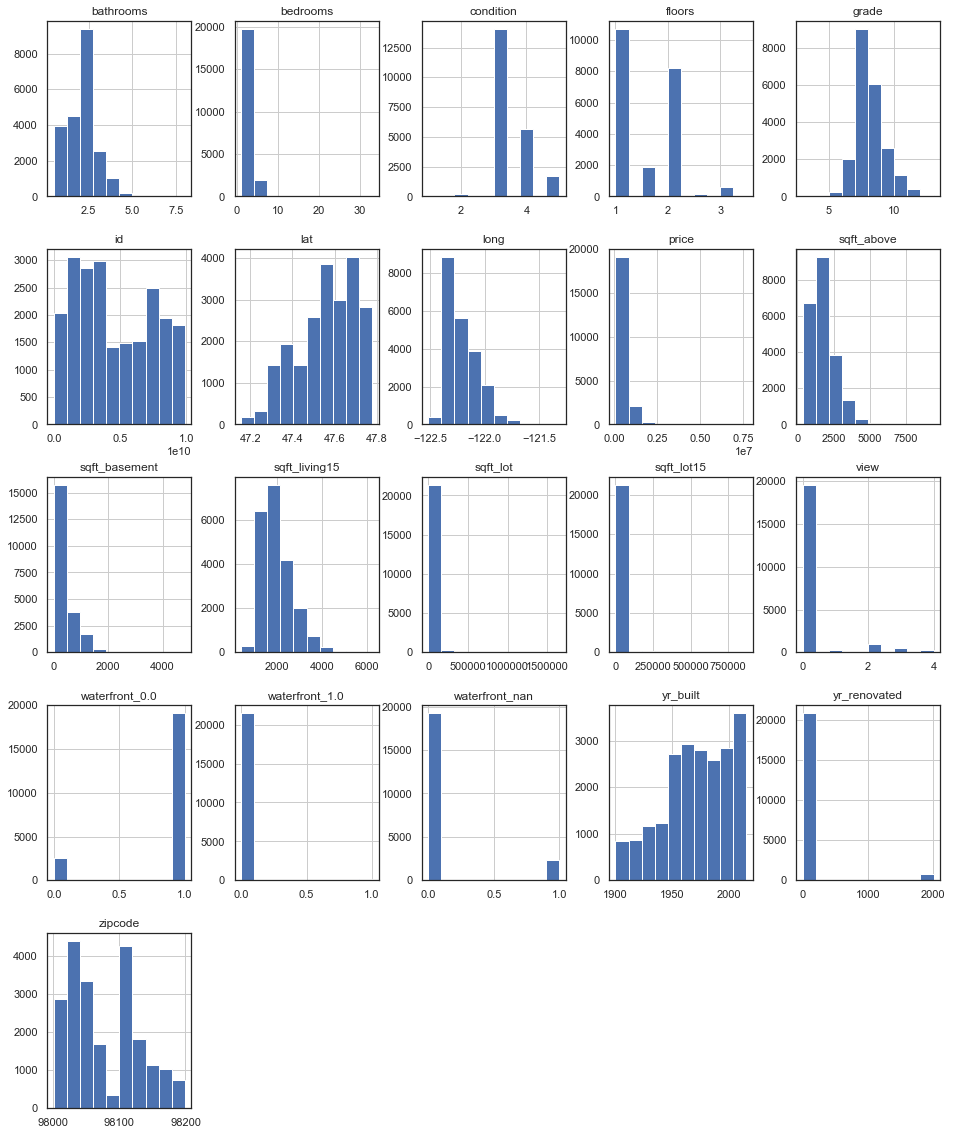

In [419]:
df.hist(figsize=(16,20));

# Closely examine each variable

let's go through each variable individually to really get a sense of things like skew, symmetry, kurtosis, etc.

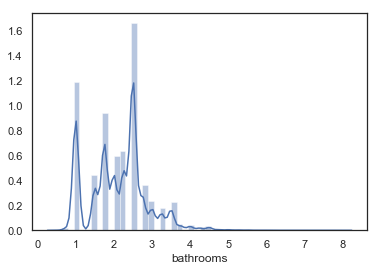

In [427]:
sns.distplot(df.bathrooms)

In [428]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

it seems kinda strange there are so many houses with just one bathroom.  must be a lot of small and/or old houses in king's county

EDA Question-
Why are there so many houses with just 1 bathroom in this dataset?

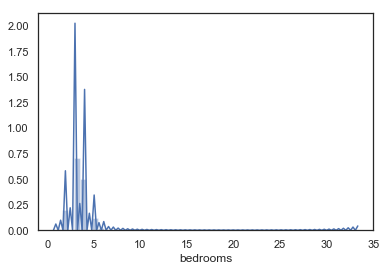

In [429]:
sns.distplot(df.bedrooms)

In [430]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

1 house having 33 bedrooms is an insane outlier.  that must be some sort of mistake, maybe that place was less a house and more of some sort of public building

EDA Question- 
Is there something special about the house with 33 bathrooms? What does the other data of the columns in that row tell us about this outlier

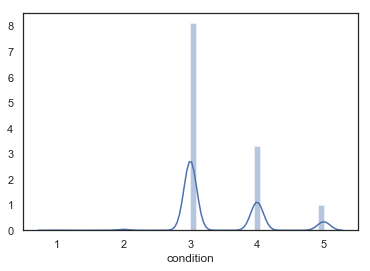

In [431]:
sns.distplot(df.condition)

In [432]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

the negative tail is extremely shallow

EDA Question-
Who came up with this condition variable? Who is making the determination of what condition a house is in? What are the criteria they use? Any information we could get about this variable from the customer would be helpful in understanding it

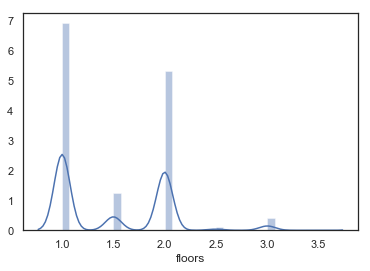

In [433]:
sns.distplot(df.floors)

not very normal.  very positively skewed and with a second peak at 2

In [434]:
df.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

Edit- The mean andn median are basically the same so technically the distribution is not skewed but it certainly looks like it.  One thing for certain is the mode (of 1) is smaller than the mean and median so this is not a normal distribution

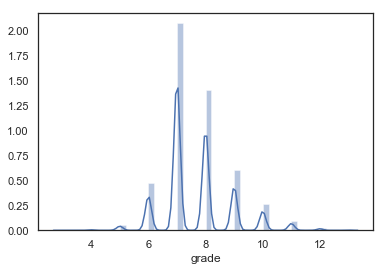

In [435]:
sns.distplot(df.grade)

the positive tail is much thicker than the negative tail.  making the distribution less symmetrical

EDA Question?
Similar to the condition variable, who and what determines a grade value?  More info from customer should be asked

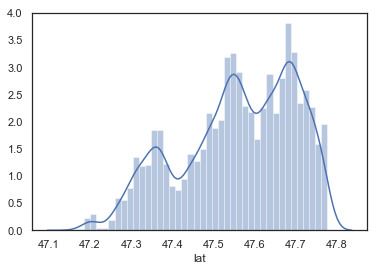

In [437]:
sns.distplot(df.lat)

slight negative skew (or at least a tail in the negative direction), sharp cutoff after peak to the positive side

In [438]:
df.lat.describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

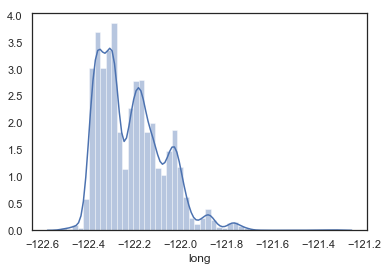

In [439]:
sns.distplot(df.long)

normality is pretty good.  just some positive skew.  edit-actually not great. still passable though

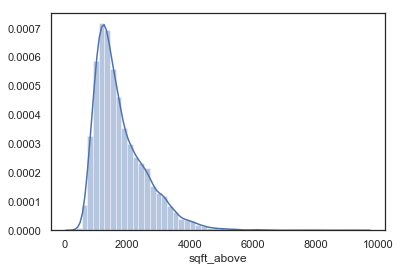

In [440]:
sns.distplot(df.sqft_above)

normality looks pretty good.  just some positive skew

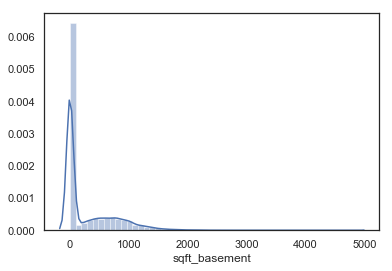

In [441]:
sns.distplot(df.sqft_basement)

normality is not great.  but it's because of the data, the 0s and 1s are just telling us either houses don't have basements or we don't know for some reason.  for the basement data that does exist, it seems normally distributed

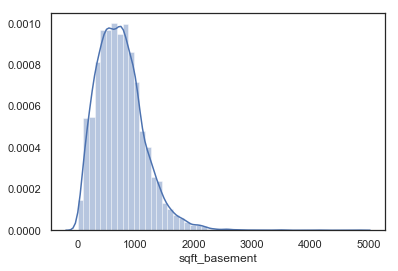

In [442]:
sns.distplot(df.loc[df.sqft_basement > 2, 'sqft_basement'])

this shows how the actual basement square footage data that exists is actually strikingly similar in distribution to the sqft_above variable

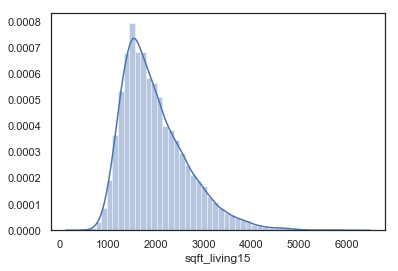

In [443]:
sns.distplot(df.sqft_living15)

sqft_living15- pretty good, positive skew

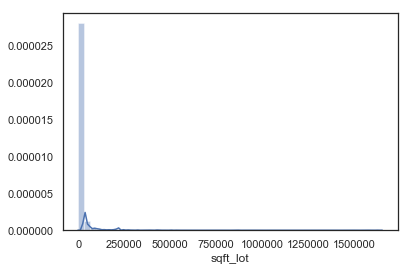

In [444]:
sns.distplot(df.sqft_lot)

In [445]:
df.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [446]:
df.loc[df.sqft_lot > 800000, 'sqft_lot'].value_counts()

871200     2
1651359    1
843309     1
920423     1
1074218    1
1164794    1
982278     1
982998     1
881654     1
1024068    1
Name: sqft_lot, dtype: int64

there are a few crazy outliers causing the extreme skew

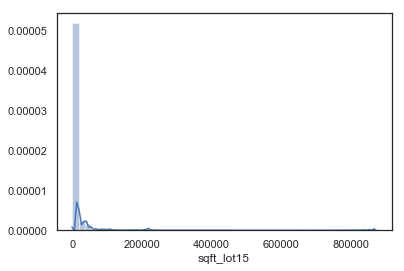

In [448]:
sns.distplot(df.sqft_lot15)

In [449]:
df.sqft_lot15.describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

sqft_lot15; extreme skew again

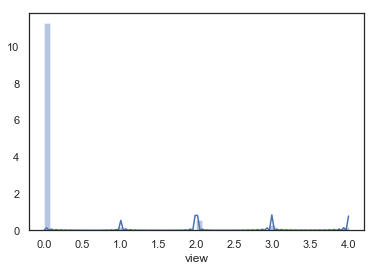

In [450]:
sns.distplot(df.view)

view- not good.  positive skew

EDA Question-
What do these values really represent?  We should go to the customer for help

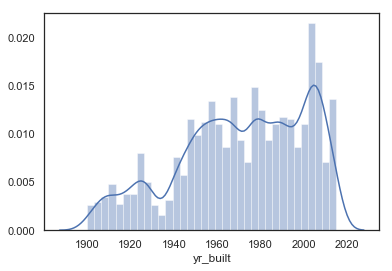

In [451]:
sns.distplot(df.yr_built)

yr_built- not terrible. negative skew

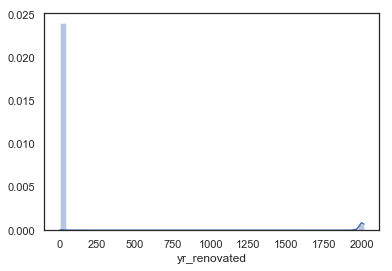

In [452]:
sns.distplot(df.yr_renovated)

In [453]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

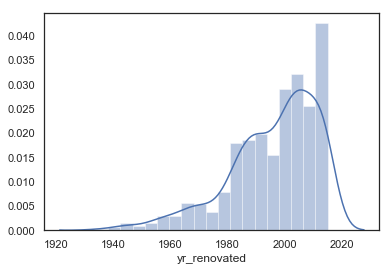

In [454]:
sns.distplot(df.loc[df.yr_renovated > 1, 'yr_renovated'])

yr_renovated- not good, crazy skew.  this really isn't a continuous variable with almost all values being 0 (null)

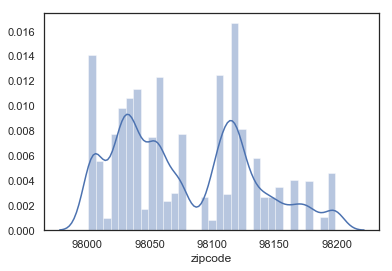

In [455]:
sns.distplot(df.zipcode)

zipcode- not good

LINEARITY CHECKS

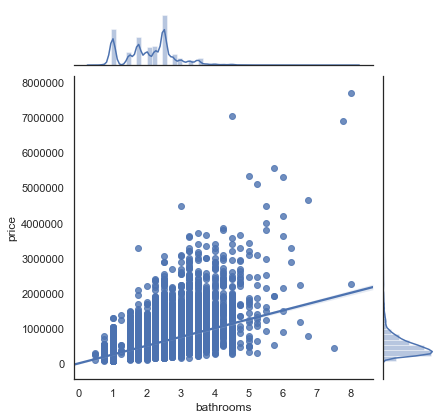

In [456]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')

looks okay

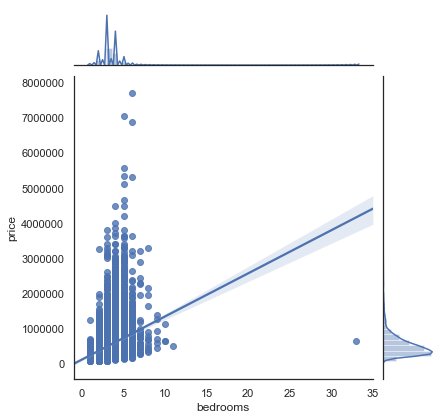

In [457]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')

even without the crazy outlier, doesn't look to be very linear, not awful though but I thought it would be moreso.  it actually looks more parabolic than linear

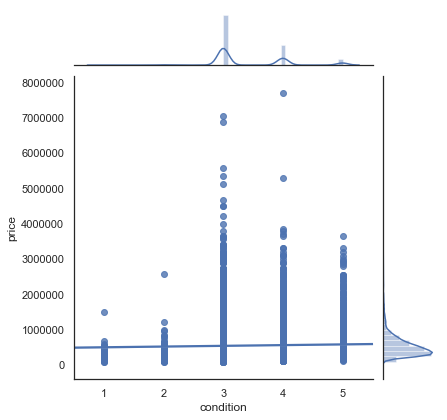

In [458]:
sns.jointplot(x='condition', y='price', data=df, kind='reg')

not continuous, shouldn't have made this plot. does still appear to be slightly positive linear relationship

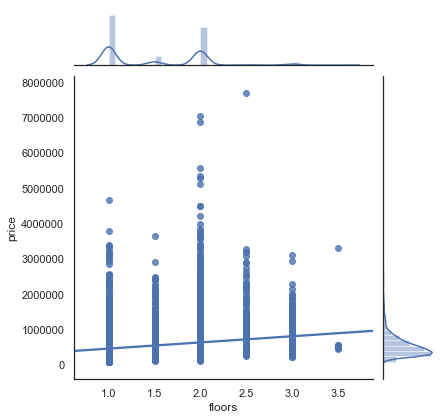

In [459]:
sns.jointplot(x='floors', y='price', data=df, kind='reg')

not great, passable though I think

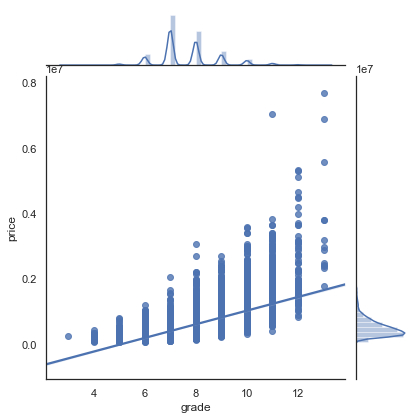

In [460]:
sns.jointplot(x='grade', y='price', data=df, kind='reg')

looks okay

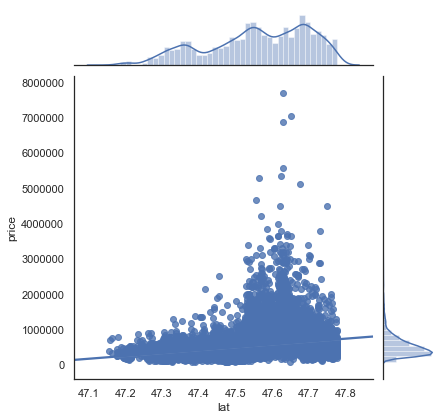

In [461]:
sns.jointplot(x='lat', y='price', data=df, kind='reg')

passable

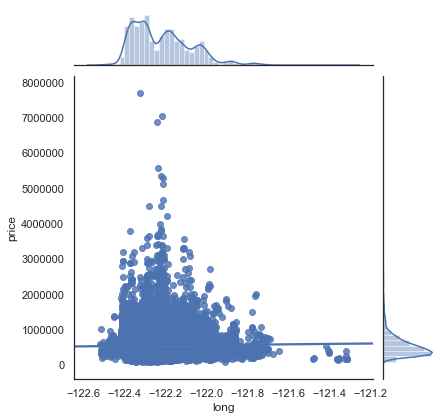

In [462]:
sns.jointplot(x='long', y='price', data=df, kind='reg')

idk. if there is any relationship it's not a linear one

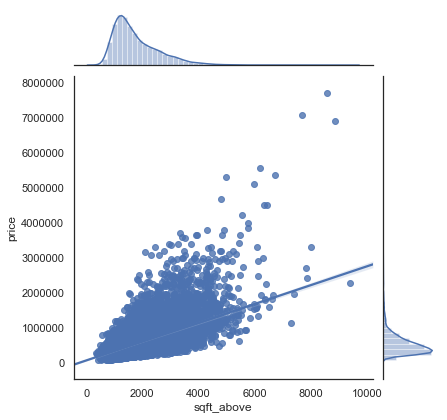

In [463]:
sns.jointplot(x='sqft_above', y='price', data=df, kind='reg')

looks good

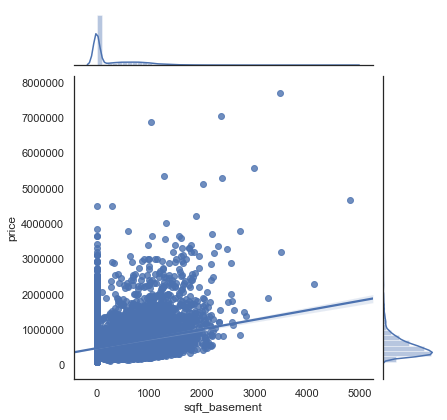

In [464]:
sns.jointplot(x='sqft_basement', y='price', data=df, kind='reg')

passable

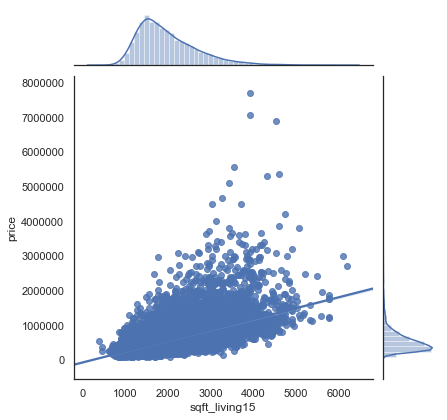

In [465]:
sns.jointplot(x='sqft_living15', y='price', data=df, kind='reg')

looks good

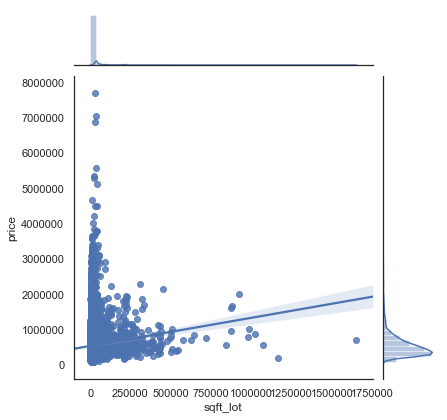

In [466]:
sns.jointplot(x='sqft_lot', y='price', data=df, kind='reg')

idk

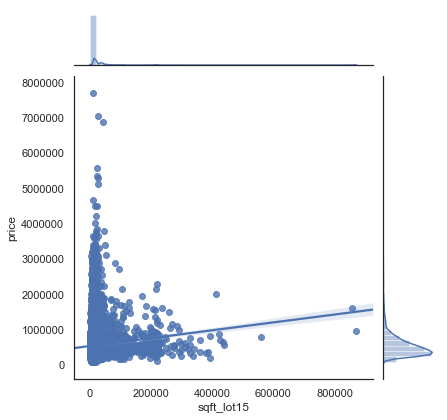

In [467]:
sns.jointplot(x='sqft_lot15', y='price', data=df, kind='reg')

idk

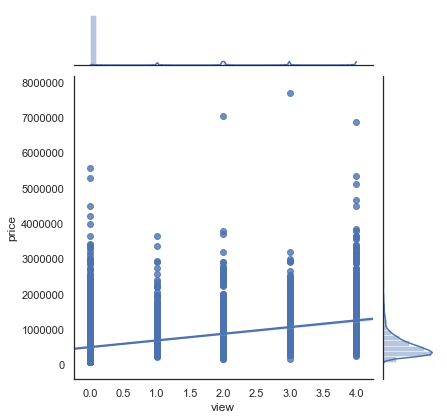

In [468]:
sns.jointplot(x='view', y='price', data=df, kind='reg')

not really continuous

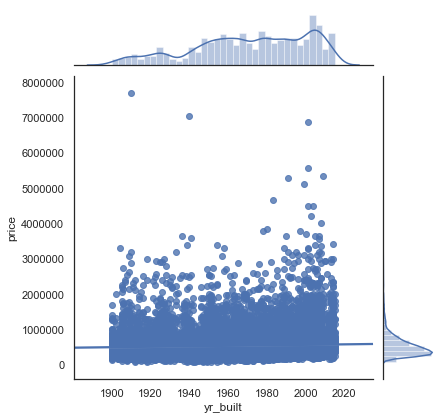

In [469]:
sns.jointplot(x='yr_built', y='price', data=df, kind='reg')

passable I think

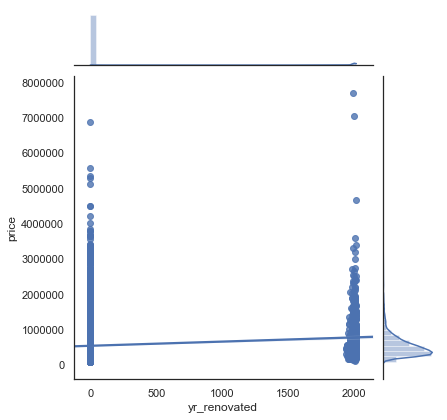

In [470]:
sns.jointplot(x='yr_renovated', y='price', data=df, kind='reg')

unreadable with the data as is

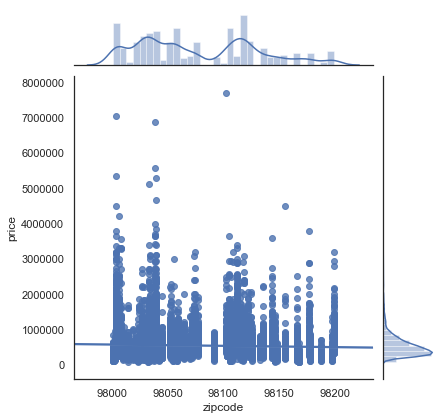

In [471]:
sns.jointplot(x='zipcode', y='price', data=df, kind='reg')

doesn't seem linear

# Drop or Change any columns?

Let's now recheck whether some variables should be altered or thrown out because they don't pass the assumptions needed to be fit to be included in our modeling later on

bathrooms- YES
    normality- ok
    linearity- ok
bedrooms- NO
    normality- not okay
    linearity- not okay
condition- YES
    normality- ok
    linearity- ok
floors- BARELY Yes
    normality- ok
    linearity- ok
grade- YES
    normality- ok
    linearity- ok
lat- slight Yes
    normality- ok
    linearity- ok
long- no
    normality- not great
    linearity- none
sqft_above- Yes
    normality- ok
    linearity- ok
*sqft_basement- 
    normality- ok
    linearity- ok
sqft_living15- Yep
    normality- ok
    linearity- ok
sqft_lot- take it or leave it
    normality- bad skew because of outliers
    linearity- not good
sqft_lot15- if you take this one, don't take previous
    normality- bad skew
    linearity- maybe passable
view- keep
    normality- not good
    linearity- ok
yr_built- No
    normality- maybe passable 
    linearity- no 
*yr_renovated- 
    normality- ok
    linearity- ok
zip- no
    normality- not good
    linearity- not good

*columns need to be changed

yr_renovated needs be changed because over 20,000 of it's values are 0.  

that leaves the few actual years that are recorded practically useless because all plots and descriptive analysis are ruined by the skewness of all the 0 values.  To still be able to get some information out of this column, I think we should change this to a dummy variable basically saying whether the house has been renovated or not.  so we'll leave all the 0 values as 0 as they represent not rennovated and then we'll change all the non-zero values to 1 to represent renovated.  then we'll use the get_dummies() method

In [474]:
df.loc[df.yr_renovated > 0.0, 'yr_renovated'] = 1.0

In [475]:
df.yr_renovated.value_counts()

0.0    20853
1.0      744
Name: yr_renovated, dtype: int64

In [476]:
df.yr_renovated = df.yr_renovated.astype('str')

In [478]:
df = pd.get_dummies(df)

Now time to change sqft_basement

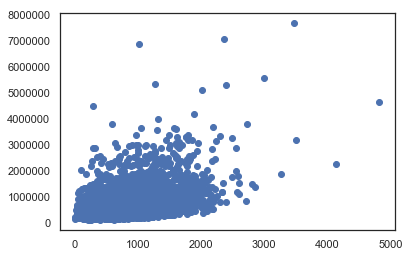

In [482]:
plt.scatter(df.loc[df.sqft_basement > 1, 'sqft_basement'], df.loc[df.sqft_basement > 1, 'price'])
plt.show()

I think we should do the same thing we just did with yr_renovated to sqft_basement.  1/2 the values are 0 which would skew the data too much to be useful as a continuous variable.  We can just change the variable to either has a basement or doesn't have a basement and see if that affects price.  but first we need to change the manufactured 1 values to 0s because they will go into the 'no basement' category too.  then we will change all values > 0 to 1 and then change to type string and then to a dummy variable format

In [483]:
df.sqft_basement.value_counts().head()

0.0      12826
1.0        454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [484]:
df.loc[df.sqft_basement == 1.0, 'sqft_basement'] = 0.0

In [485]:
df.loc[df.sqft_basement > 1.0, 'sqft_basement'] = 1.0

In [486]:
df.sqft_basement.value_counts()

0.0    13280
1.0     8317
Name: sqft_basement, dtype: int64

In [487]:
df.sqft_basement = df.sqft_basement.astype('str')

In [488]:
df = pd.get_dummies(df)

In [489]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,...,long,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,3,7,...,-122.257,1340,5650,0,0,1,1,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,3,7,...,-122.319,1690,7639,1,0,0,0,1,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,3,6,...,-122.233,2720,8062,1,0,0,1,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,5,7,...,-122.393,1360,5000,1,0,0,1,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,3,8,...,-122.045,1800,7503,1,0,0,1,0,1,0


# Drop Columns
okay, time to remove the variables that fail the normality assumptions too badly
bedrooms, long, yr_built, zipcode

In [490]:
df = df.drop(['bedrooms', 'long', 'yr_built', 'zipcode'], axis=1)

In [491]:
df.head()

,id,date,price,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,7129300520,2014-10-13,221900.0,1.00,5650,1.0,0.0,3,7,1180,47.5112,1340,5650,0,0,1,1,0,1,0
1,6414100192,2014-12-09,538000.0,2.25,7242,2.0,0.0,3,7,2170,47.7210,1690,7639,1,0,0,0,1,0,1
2,5631500400,2015-02-25,180000.0,1.00,10000,1.0,0.0,3,6,770,47.7379,2720,8062,1,0,0,1,0,1,0
3,2487200875,2014-12-09,604000.0,3.00,5000,1.0,0.0,5,7,1050,47.5208,1360,5000,1,0,0,1,0,0,1
4,1954400510,2015-02-18,510000.0,2.00,8080,1.0,0.0,3,8,1680,47.6168,1800,7503,1,0,0,1,0,1,0


In [492]:
predictors = df.loc[:, df.drop(['id', 'date', 'price'], axis=1).columns]
#making a separate df for just the predictor variables.  id and date are just informative variables, I don't think they
#were meant to be analyzed like the others.  and then the price variable is our target variable

# Modeling

Initial model

In [493]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2982.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:54:35   Log-Likelihood:            -2.9577e+05
No. Observations:               21597   AIC:                         5.916e+05
Df Residuals:                   21582   BIC:                         5.917e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -1.39e+07   2.21e+05    -62.987      0.000   -1.43e+07   -1.35e+07
bathrooms          8702.7874   3116.859      2.792      0.005    2593.514    1.48e+04
sqft_lot              0.1546      0.051      3.037      0.002       0.055       0.254
floors            -3.779e+04   3614.206    -10.456      0.000   -4.49e+04   -3.07e+04
view               7.347e+04   2195.224     33.469      0.000    6.92e+04    7.78e+04
condition          6.338e+04   2343.748     27.042      0.000    5.88e+04     6.8e+04
grade              9.223e+04   2211.497     41.703      0.000    8.79e+04    9.66e+04
sqft_above          169.4622      3.748     45.215      0.000     162.116     176.808
lat                 6.73e+05   1.09e+04     62.013      0.000    6.52e+05    6.94e+05
sqft_living15        22.7868      3.544      6.429      0.000      15.840      29.734
sqft_lot15           -0.5079      0.078     -6.535      0.000      -0.660      -0.356
waterfront_0.0    -4.842e+06   7.38e+04    -65.595      0.000   -4.99e+06    -4.7e+06
waterfront_1.0    -4.207e+06   7.47e+04    -56.333      0.000   -4.35e+06   -4.06e+06
waterfront_nan    -4.847e+06   7.39e+04    -65.600      0.000   -4.99e+06    -4.7e+06
yr_renovated_0.0  -7.022e+06    1.1e+05    -63.696      0.000   -7.24e+06   -6.81e+06
yr_renovated_1.0  -6.874e+06   1.11e+05    -62.196      0.000   -7.09e+06   -6.66e+06
sqft_basement_0.0     -7e+06    1.1e+05    -63.591      0.000   -7.22e+06   -6.78e+06
sqft_basement_1.0 -6.896e+06   1.11e+05    -62.367      0.000   -7.11e+06   -6.68e+06
==============================================================================
Omnibus:                    19562.433   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2230114.436
Skew:                           3.930   Prob(JB):                         0.00
Kurtosis:                      52.158   Cond. No.                     4.85e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Seems like a pretty good initial model with an adj R2 of .659.  But the skew is high at 3.93, the kurtosis is high at 52 and the JB is over 2 million!  So there is definitely improvement to be made

I have not scaled or normalized the data yet.  It probably should be done

In [495]:

# df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()
# df.sqft_lot = (df.sqft_lot - df.sqft_lot.mean()) / df.sqft_lot.std()
# df.floors = (df.floors - df.floors.mean()) / df.floors.std()
# df.view = (df.view - df.view.mean()) / df.view.std()
# df.condition = (df.condition - df.condition.mean()) / df.condition.std()
# df.grade = (df.grade - df.grade.mean()) / df.grade.std()
# df.sqft_above = (df.sqft_above - df.sqft_above.mean()) / df.sqft_above.std()




# df.lat = (df.lat - df.lat.mean()) / df.lat.std()

# df.sqft_living15 = (df.sqft_living15 - df.sqft_living15.mean()) / df.sqft_living15.std()
# df.sqft_lot15 = (df.sqft_lot15 - df.sqft_lot15.mean()) / df.sqft_lot15.std()

In [496]:
df.head()

,id,date,price,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,7129300520,2014-10-13,221900.0,1.00,5650,1.0,0.0,3,7,1180,47.5112,1340,5650,0,0,1,1,0,1,0
1,6414100192,2014-12-09,538000.0,2.25,7242,2.0,0.0,3,7,2170,47.7210,1690,7639,1,0,0,0,1,0,1
2,5631500400,2015-02-25,180000.0,1.00,10000,1.0,0.0,3,6,770,47.7379,2720,8062,1,0,0,1,0,1,0
3,2487200875,2014-12-09,604000.0,3.00,5000,1.0,0.0,5,7,1050,47.5208,1360,5000,1,0,0,1,0,0,1
4,1954400510,2015-02-18,510000.0,2.00,8080,1.0,0.0,3,8,1680,47.6168,1800,7503,1,0,0,1,0,1,0


In [497]:
# df.price = (df.price - df.price.mean()) / df.price.std()

Okay, let's run the regression test again now that the data has been scaled again

In [498]:
predictors = df.loc[:, df.drop(['id', 'date', 'price'], axis=1).columns]

In [499]:
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2982.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:54:35   Log-Likelihood:            -2.9577e+05
No. Observations:               21597   AIC:                         5.916e+05
Df Residuals:                   21582   BIC:                         5.917e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -1.39e+07   2.21e+05    -62.987      0.000   -1.43e+07   -1.35e+07
bathrooms          8702.7874   3116.859      2.792      0.005    2593.514    1.48e+04
sqft_lot              0.1546      0.051      3.037      0.002       0.055       0.254
floors            -3.779e+04   3614.206    -10.456      0.000   -4.49e+04   -3.07e+04
view               7.347e+04   2195.224     33.469      0.000    6.92e+04    7.78e+04
condition          6.338e+04   2343.748     27.042      0.000    5.88e+04     6.8e+04
grade              9.223e+04   2211.497     41.703      0.000    8.79e+04    9.66e+04
sqft_above          169.4622      3.748     45.215      0.000     162.116     176.808
lat                 6.73e+05   1.09e+04     62.013      0.000    6.52e+05    6.94e+05
sqft_living15        22.7868      3.544      6.429      0.000      15.840      29.734
sqft_lot15           -0.5079      0.078     -6.535      0.000      -0.660      -0.356
waterfront_0.0    -4.842e+06   7.38e+04    -65.595      0.000   -4.99e+06    -4.7e+06
waterfront_1.0    -4.207e+06   7.47e+04    -56.333      0.000   -4.35e+06   -4.06e+06
waterfront_nan    -4.847e+06   7.39e+04    -65.600      0.000   -4.99e+06    -4.7e+06
yr_renovated_0.0  -7.022e+06    1.1e+05    -63.696      0.000   -7.24e+06   -6.81e+06
yr_renovated_1.0  -6.874e+06   1.11e+05    -62.196      0.000   -7.09e+06   -6.66e+06
sqft_basement_0.0     -7e+06    1.1e+05    -63.591      0.000   -7.22e+06   -6.78e+06
sqft_basement_1.0 -6.896e+06   1.11e+05    -62.367      0.000   -7.11e+06   -6.68e+06
==============================================================================
Omnibus:                    19562.433   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2230114.436
Skew:                           3.930   Prob(JB):                         0.00
Kurtosis:                      52.158   Cond. No.                     4.85e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.34e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

the major statistics did not change

let's use recursive feature selection to find out the better fitting predictors

In [500]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(predictors, df.price)

In [501]:
from itertools import compress

In [502]:
winners = list(compress(predictors.columns, selector.support_))
winners

['lat', 'waterfront_1.0']

RFE thinks these are the best two predictors

In [503]:

r_squared = []
adj_r_sq = []


linreg = LinearRegression()
for n in range(5,len(predictors.columns),2):
    selectors = RFE(linreg, n_features_to_select = n)
    selectors = selectors.fit(predictors, df.price)
    winners = list(compress(predictors.columns, selectors.support_))
    print(winners)
    
    with_intercept = sm.add_constant(predictors[winners])
    model = sm.OLS(df.price, with_intercept).fit()
    
    linreg2 = LinearRegression()
    linreg2.fit(predictors[winners], df.price)
    y_hat = linreg2.predict(predictors[winners])
    mse = np.sum((df.price - y_hat)**2)/len(df.price)
    
    print(model.rsquared)
    print(model.rsquared_adj)
    print(mse)
    
   

['grade', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan']
0.5462842210908194
0.5462001685196987
61230351506.82676
['view', 'grade', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0']
0.581477395816435
0.5813610856902145
56481861855.57077


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['bathrooms', 'view', 'grade', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0']
0.5947898830095365
0.5946584980070383
54684361996.620964
['bathrooms', 'floors', 'view', 'condition', 'grade', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0']
0.6125506214309852
0.6123890869701003
52287495263.926125
['bathrooms', 'floors', 'view', 'condition', 'grade', 'lat', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0', 'sqft_basement_0.0', 'sqft_basement_1.0']

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



0.613149319830327
0.6129701061361874
52206699058.14636
['bathrooms', 'floors', 'view', 'condition', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'waterfront_0.0', 'waterfront_1.0', 'waterfront_nan', 'yr_renovated_0.0', 'yr_renovated_1.0', 'sqft_basement_0.0', 'sqft_basement_1.0']
0.6584734490713184
0.6582835714484893
46090067249.9274


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The R2 and adjusted R2 of .659 is pretty good.  But the skew is 3.93.  and the kurtosis is 52 and the jarque-bera is over 2 million!.  Maybe we can readjust our data to help with these.  Maybe log'ing the data can help.  I'm also going to go back and look at multicollinearity again to see if the new dummy columns are presenting new problems on that front that we didn't see last time we looked at multicollinearity

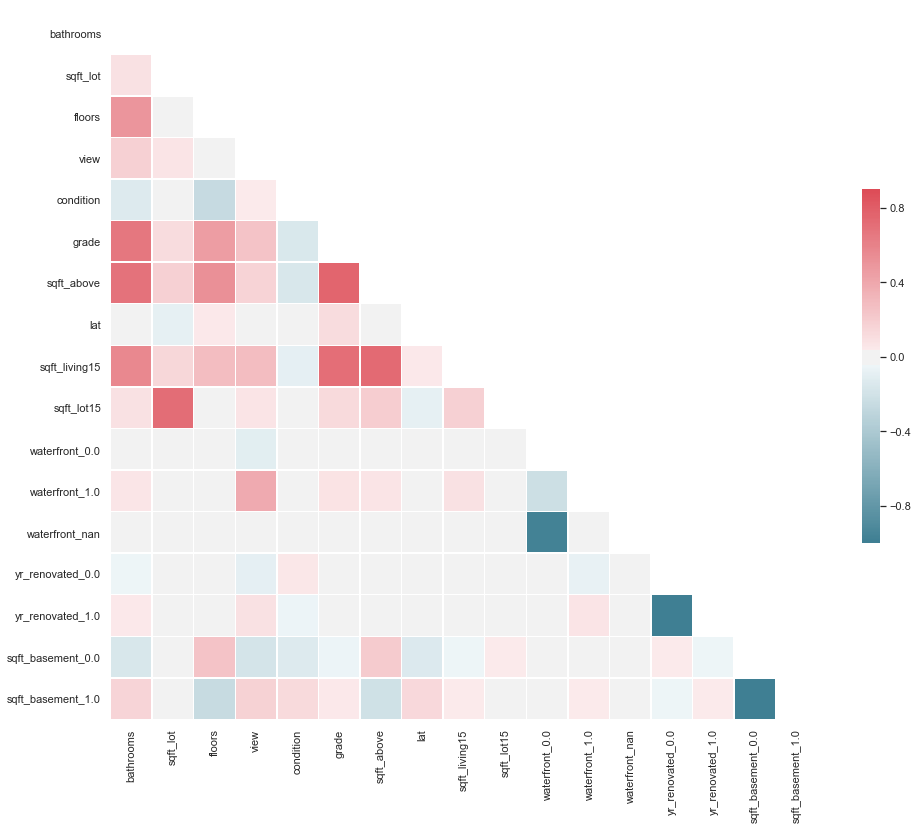

In [504]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = predictors.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [505]:
abs(corr) > .75

,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
bathrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


maybe we should only have 1 of sqft_lot15 and sqft_lot.  it makes sense that these might be correlated

In [506]:
df = df.drop('sqft_lot', axis=1)

In [507]:
predictors = predictors.drop('sqft_lot', axis=1)

In [508]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     3210.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:54:37   Log-Likelihood:            -2.9577e+05
No. Observations:               21597   AIC:                         5.916e+05
Df Residuals:                   21583   BIC:                         5.917e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.387e+07   2.21e+05    -62.910      0.000   -1.43e+07   -1.34e+07
bathrooms          8663.5449   3117.426      2.779      0.005    2553.160    1.48e+04
floors             -3.82e+04   3612.332    -10.576      0.000   -4.53e+04   -3.11e+04
view               7.369e+04   2194.438     33.582      0.000    6.94e+04     7.8e+04
condition          6.331e+04   2344.084     27.009      0.000    5.87e+04    6.79e+04
grade              9.228e+04   2211.846     41.721      0.000    8.79e+04    9.66e+04
sqft_above          170.2530      3.740     45.527      0.000     162.923     177.583
lat                6.719e+05   1.08e+04     61.936      0.000    6.51e+05    6.93e+05
sqft_living15        22.2228      3.540      6.278      0.000      15.284      29.161
sqft_lot15           -0.3424      0.055     -6.178      0.000      -0.451      -0.234
waterfront_0.0    -4.835e+06   7.38e+04    -65.518      0.000   -4.98e+06   -4.69e+06
waterfront_1.0      -4.2e+06   7.47e+04    -56.258      0.000   -4.35e+06   -4.05e+06
waterfront_nan    -4.839e+06   7.39e+04    -65.523      0.000   -4.98e+06   -4.69e+06
yr_renovated_0.0  -7.011e+06    1.1e+05    -63.619      0.000   -7.23e+06    -6.8e+06
yr_renovated_1.0  -6.864e+06    1.1e+05    -62.119      0.000   -7.08e+06   -6.65e+06
sqft_basement_0.0 -6.989e+06    1.1e+05    -63.515      0.000    -7.2e+06   -6.77e+06
sqft_basement_1.0 -6.885e+06   1.11e+05    -62.290      0.000    -7.1e+06   -6.67e+06
==============================================================================
Omnibus:                    19534.300   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2215298.258
Skew:                           3.922   Prob(JB):                         0.00
Kurtosis:                      51.992   Cond. No.                     5.27e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

the major stats did not improve but the categorical columns pvalues are messed up now.  don't know why

In [509]:
predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,1.00,1.0,0.0,3,7,1180,47.5112,1340,5650,0,0,1,1,0,1,0
1,2.25,2.0,0.0,3,7,2170,47.7210,1690,7639,1,0,0,0,1,0,1
2,1.00,1.0,0.0,3,6,770,47.7379,2720,8062,1,0,0,1,0,1,0
3,3.00,1.0,0.0,5,7,1050,47.5208,1360,5000,1,0,0,1,0,0,1
4,2.00,1.0,0.0,3,8,1680,47.6168,1800,7503,1,0,0,1,0,1,0


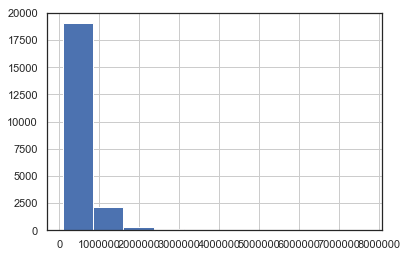

In [510]:
df.price.hist()

In [511]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

the target is very skewed, lets definitely take the log of that to see if that helps

In [512]:
df.price = np.log(df.price)

now let's run the ols to see the impact just that had

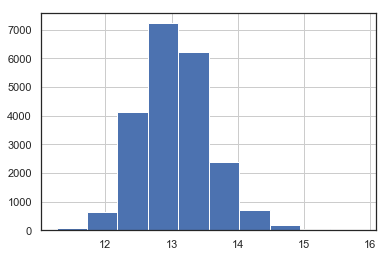

In [513]:
df.price.hist()

In [514]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4991.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:56:47   Log-Likelihood:                -1806.1
No. Observations:               21597   AIC:                             3640.
Df Residuals:                   21583   BIC:                             3752.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -25.0523      0.270    -92.616      0.000     -25.582     -24.522
bathrooms             0.0212      0.004      5.543      0.000       0.014       0.029
floors                0.0261      0.004      5.899      0.000       0.017       0.035
view                  0.0806      0.003     29.937      0.000       0.075       0.086
condition             0.1082      0.003     37.631      0.000       0.103       0.114
grade                 0.1419      0.003     52.291      0.000       0.137       0.147
sqft_above            0.0002   4.59e-06     36.227      0.000       0.000       0.000
lat                   1.4653      0.013    110.130      0.000       1.439       1.491
sqft_living15      9.653e-05   4.34e-06     22.233      0.000     8.8e-05       0.000
sqft_lot15          1.29e-07    6.8e-08      1.898      0.058   -4.24e-09    2.62e-07
waterfront_0.0       -8.4762      0.091    -93.650      0.000      -8.654      -8.299
waterfront_1.0       -8.0944      0.092    -88.397      0.000      -8.274      -7.915
waterfront_nan       -8.4816      0.091    -93.631      0.000      -8.659      -8.304
yr_renovated_0.0    -12.6268      0.135    -93.419      0.000     -12.892     -12.362
yr_renovated_1.0    -12.4254      0.136    -91.690      0.000     -12.691     -12.160
sqft_basement_0.0   -12.6059      0.135    -93.402      0.000     -12.870     -12.341
sqft_basement_1.0   -12.4464      0.136    -91.806      0.000     -12.712     -12.181
==============================================================================
Omnibus:                      401.512   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.379
Skew:                           0.190   Prob(JB):                    1.30e-137
Kurtosis:                       3.746   Cond. No.                     5.27e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

wow, major improvement.  now let's revisit all the predictors that had bad skew and do a log on them

after going back in the notebook to check the plots for each column during EDA, grade and sqft_living15 are the only ones that don't have skew problems.  So lets log all the other features and see if that improves the fit

In [515]:
log_predictors = predictors

In [516]:
log_predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,1.00,1.0,0.0,3,7,1180,47.5112,1340,5650,0,0,1,1,0,1,0
1,2.25,2.0,0.0,3,7,2170,47.7210,1690,7639,1,0,0,0,1,0,1
2,1.00,1.0,0.0,3,6,770,47.7379,2720,8062,1,0,0,1,0,1,0
3,3.00,1.0,0.0,5,7,1050,47.5208,1360,5000,1,0,0,1,0,0,1
4,2.00,1.0,0.0,3,8,1680,47.6168,1800,7503,1,0,0,1,0,1,0


In [517]:
log_predictors.bathrooms = np.log(log_predictors.bathrooms)
log_predictors.floors = np.log(log_predictors.floors)
log_predictors.view = np.log(log_predictors.view)
log_predictors.condition = np.log(log_predictors.condition)
log_predictors.sqft_above = np.log(log_predictors.sqft_above)
log_predictors.lat = np.log(log_predictors.lat)
log_predictors.sqft_lot15 = np.log(log_predictors.sqft_lot15)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [518]:
log_predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,0.000000,0.000000,-inf,1.098612,7,7.073270,3.860965,1340,8.639411,0,0,1,1,0,1,0
1,0.810930,0.693147,-inf,1.098612,7,7.682482,3.865372,1690,8.941022,1,0,0,0,1,0,1
2,0.000000,0.000000,-inf,1.098612,6,6.646391,3.865726,2720,8.994917,1,0,0,1,0,1,0
3,1.098612,0.000000,-inf,1.609438,7,6.956545,3.861168,1360,8.517193,1,0,0,1,0,0,1
4,0.693147,0.000000,-inf,1.098612,8,7.426549,3.863186,1800,8.923058,1,0,0,1,0,1,0


In [526]:
(log_predictors.view == -np.inf).sum()

19485

In [533]:
(log_predictors.sqft_lot15 == -np.inf).sum()

0

none of the columns besides view have -inf values so it was the only row with "0" values that messed up the log process.  I'll just change the view column back to the unlogged data

In [534]:
log_predictors.view = predictors.view

In [536]:
predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,0.000000,0.000000,-inf,1.098612,7,7.073270,3.860965,1340,8.639411,0,0,1,1,0,1,0
1,0.810930,0.693147,-inf,1.098612,7,7.682482,3.865372,1690,8.941022,1,0,0,0,1,0,1
2,0.000000,0.000000,-inf,1.098612,6,6.646391,3.865726,2720,8.994917,1,0,0,1,0,1,0
3,1.098612,0.000000,-inf,1.609438,7,6.956545,3.861168,1360,8.517193,1,0,0,1,0,0,1
4,0.693147,0.000000,-inf,1.098612,8,7.426549,3.863186,1800,8.923058,1,0,0,1,0,1,0


        whoops, it seems I changed the predictors df when I only wanted to change the log_predictor's df

In [537]:
predictors = df.loc[:, df.drop(['id', 'date', 'price'], axis=1).columns]

In [538]:
log_predictors.view = predictors.view

In [539]:
log_predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,0.000000,0.000000,0.0,1.098612,7,7.073270,3.860965,1340,8.639411,0,0,1,1,0,1,0
1,0.810930,0.693147,0.0,1.098612,7,7.682482,3.865372,1690,8.941022,1,0,0,0,1,0,1
2,0.000000,0.000000,0.0,1.098612,6,6.646391,3.865726,2720,8.994917,1,0,0,1,0,1,0
3,1.098612,0.000000,0.0,1.609438,7,6.956545,3.861168,1360,8.517193,1,0,0,1,0,0,1
4,0.693147,0.000000,0.0,1.098612,8,7.426549,3.863186,1800,8.923058,1,0,0,1,0,1,0


In [540]:
log_predictors_int = sm.add_constant(log_predictors)
model = sm.OLS(df.price,log_predictors_int).fit()
model.summary()

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4978.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:27   Log-Likelihood:                -1827.0
No. Observations:               21597   AIC:                             3682.
Df Residuals:                   21583   BIC:                             3794.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -110.7794      1.059   -104.599      0.000    -112.855    -108.704
bathrooms            -0.0087      0.007     -1.171      0.242      -0.023       0.006
floors                0.0098      0.008      1.283      0.200      -0.005       0.025
view                  0.0809      0.003     30.031      0.000       0.076       0.086
condition             0.3725      0.010     36.135      0.000       0.352       0.393
grade                 0.1456      0.003     54.575      0.000       0.140       0.151
sqft_above            0.3528      0.009     38.413      0.000       0.335       0.371
lat                  69.2944      0.639    108.476      0.000      68.042      70.546
sqft_living15         0.0001   4.39e-06     25.914      0.000       0.000       0.000
sqft_lot15           -0.0280      0.003    -10.159      0.000      -0.033      -0.023
waterfront_0.0      -37.0634      0.353   -104.960      0.000     -37.756     -36.371
waterfront_1.0      -36.6458      0.353   -103.705      0.000     -37.338     -35.953
waterfront_nan      -37.0702      0.353   -104.969      0.000     -37.762     -36.378
yr_renovated_0.0    -55.4904      0.529   -104.820      0.000     -56.528     -54.453
yr_renovated_1.0    -55.2890      0.530   -104.369      0.000     -56.327     -54.251
sqft_basement_0.0   -55.4719      0.529   -104.799      0.000     -56.509     -54.434
sqft_basement_1.0   -55.3075      0.530   -104.397      0.000     -56.346     -54.269
==============================================================================
Omnibus:                      547.029   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.463
Skew:                           0.269   Prob(JB):                    2.28e-177
Kurtosis:                       3.784   Cond. No.                     2.82e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

largely the same, but bathroom and floors now is giving us troubles where as it didn't before it was logged.  let's unlog bathrooms and check the difference

In [541]:
log_predictors.bathrooms = predictors.bathrooms
log_predictors.floors = predictors.floors

In [542]:
log_predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,sqft_lot15,waterfront_0.0,waterfront_1.0,waterfront_nan,yr_renovated_0.0,yr_renovated_1.0,sqft_basement_0.0,sqft_basement_1.0
0,1.00,1.0,0.0,1.098612,7,7.073270,3.860965,1340,8.639411,0,0,1,1,0,1,0
1,2.25,2.0,0.0,1.098612,7,7.682482,3.865372,1690,8.941022,1,0,0,0,1,0,1
2,1.00,1.0,0.0,1.098612,6,6.646391,3.865726,2720,8.994917,1,0,0,1,0,1,0
3,3.00,1.0,0.0,1.609438,7,6.956545,3.861168,1360,8.517193,1,0,0,1,0,0,1
4,2.00,1.0,0.0,1.098612,8,7.426549,3.863186,1800,8.923058,1,0,0,1,0,1,0


In [543]:
log_predictors_int = sm.add_constant(log_predictors)
model = sm.OLS(df.price,log_predictors_int).fit()
model.summary()

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4983.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        11:29:30   Log-Likelihood:                -1818.5
No. Observations:               21597   AIC:                             3665.
Df Residuals:                   21583   BIC:                             3777.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -111.1885      1.057   -105.148      0.000    -113.261    -109.116
bathrooms             0.0170      0.004      4.403      0.000       0.009       0.025
floors               -0.0047      0.005     -0.961      0.336      -0.014       0.005
view                  0.0810      0.003     30.111      0.000       0.076       0.086
condition             0.3713      0.010     36.009      0.000       0.351       0.392
grade                 0.1438      0.003     53.587      0.000       0.139       0.149
sqft_above            0.3361      0.009     37.135      0.000       0.318       0.354
lat                  69.5698      0.638    109.099      0.000      68.320      70.820
sqft_living15         0.0001    4.4e-06     25.651      0.000       0.000       0.000
sqft_lot15           -0.0281      0.003    -10.204      0.000      -0.034      -0.023
waterfront_0.0      -37.1999      0.353   -105.510      0.000     -37.891     -36.509
waterfront_1.0      -36.7819      0.353   -104.248      0.000     -37.474     -36.090
waterfront_nan      -37.2067      0.353   -105.519      0.000     -37.898     -36.516
yr_renovated_0.0    -55.6942      0.529   -105.368      0.000     -56.730     -54.658
yr_renovated_1.0    -55.4943      0.529   -104.918      0.000     -56.531     -54.458
sqft_basement_0.0   -55.6707      0.529   -105.334      0.000     -56.707     -54.635
sqft_basement_1.0   -55.5179      0.529   -104.959      0.000     -56.555     -54.481
==============================================================================
Omnibus:                      548.131   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.862
Skew:                           0.274   Prob(JB):                    2.78e-175
Kurtosis:                       3.770   Cond. No.                     8.47e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

bathrooms is improved but floors is still bad.  i don't know what's going on.  let's experiment with running the OLS dropping floors to see if the problem just switches to another variable

In [544]:
log_predictors_int = sm.add_constant(log_predictors.drop('floors', axis=1))
model = sm.OLS(df.price,log_predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     5398.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:05   Log-Likelihood:                -1819.0
No. Observations:               21597   AIC:                             3664.
Df Residuals:                   21584   BIC:                             3768.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -111.1610      1.057   -105.160      0.000    -113.233    -109.089
bathrooms             0.0162      0.004      4.297      0.000       0.009       0.024
view                  0.0811      0.003     30.118      0.000       0.076       0.086
condition             0.3728      0.010     36.557      0.000       0.353       0.393
grade                 0.1435      0.003     53.831      0.000       0.138       0.149
sqft_above            0.3338      0.009     38.254      0.000       0.317       0.351
lat                  69.5536      0.637    109.112      0.000      68.304      70.803
sqft_living15         0.0001   4.38e-06     25.868      0.000       0.000       0.000
sqft_lot15           -0.0270      0.003    -10.777      0.000      -0.032      -0.022
waterfront_0.0      -37.1905      0.352   -105.524      0.000     -37.881     -36.500
waterfront_1.0      -36.7732      0.353   -104.258      0.000     -37.465     -36.082
waterfront_nan      -37.1973      0.352   -105.533      0.000     -37.888     -36.506
yr_renovated_0.0    -55.6805      0.528   -105.381      0.000     -56.716     -54.645
yr_renovated_1.0    -55.4805      0.529   -104.931      0.000     -56.517     -54.444
sqft_basement_0.0   -55.6575      0.528   -105.345      0.000     -56.693     -54.622
sqft_basement_1.0   -55.5035      0.529   -104.974      0.000     -56.540     -54.467
==============================================================================
Omnibus:                      551.946   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.720
Skew:                           0.275   Prob(JB):                    9.00e-177
Kurtosis:                       3.774   Cond. No.                     6.40e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Okay, logging to the predictors did not help the model.  It just made the skew and JB slightly worse while improving nothing.  Since it's always better to keep the data the most close to it's original form when all things are equal I think we should do no logging of the predictors and move on from there

In [545]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4991.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        14:46:35   Log-Likelihood:                -1806.1
No. Observations:               21597   AIC:                             3640.
Df Residuals:                   21583   BIC:                             3752.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -25.0523      0.270    -92.616      0.000     -25.582     -24.522
bathrooms             0.0212      0.004      5.543      0.000       0.014       0.029
floors                0.0261      0.004      5.899      0.000       0.017       0.035
view                  0.0806      0.003     29.937      0.000       0.075       0.086
condition             0.1082      0.003     37.631      0.000       0.103       0.114
grade                 0.1419      0.003     52.291      0.000       0.137       0.147
sqft_above            0.0002   4.59e-06     36.227      0.000       0.000       0.000
lat                   1.4653      0.013    110.130      0.000       1.439       1.491
sqft_living15      9.653e-05   4.34e-06     22.233      0.000     8.8e-05       0.000
sqft_lot15          1.29e-07    6.8e-08      1.898      0.058   -4.24e-09    2.62e-07
waterfront_0.0       -8.4762      0.091    -93.650      0.000      -8.654      -8.299
waterfront_1.0       -8.0944      0.092    -88.397      0.000      -8.274      -7.915
waterfront_nan       -8.4816      0.091    -93.631      0.000      -8.659      -8.304
yr_renovated_0.0    -12.6268      0.135    -93.419      0.000     -12.892     -12.362
yr_renovated_1.0    -12.4254      0.136    -91.690      0.000     -12.691     -12.160
sqft_basement_0.0   -12.6059      0.135    -93.402      0.000     -12.870     -12.341
sqft_basement_1.0   -12.4464      0.136    -91.806      0.000     -12.712     -12.181
==============================================================================
Omnibus:                      401.512   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.379
Skew:                           0.190   Prob(JB):                    1.30e-137
Kurtosis:                       3.746   Cond. No.                     5.27e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

I forgot that we need to drop one of each of the categorical columns from the modeling
I'm gonna do a test model with the dropped columns before doing this permanently to the predictors datafile

In [554]:
predictors_int = sm.add_constant(predictors.drop(['waterfront_1.0', 'yr_renovated_0.0', 'sqft_basement_0.0'], axis=1))
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     4991.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        15:15:57   Log-Likelihood:                -1806.1
No. Observations:               21597   AIC:                             3640.
Df Residuals:                   21583   BIC:                             3752.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -58.3794      0.631    -92.530      0.000     -59.616     -57.143
bathrooms             0.0212      0.004      5.543      0.000       0.014       0.029
floors                0.0261      0.004      5.899      0.000       0.017       0.035
view                  0.0806      0.003     29.937      0.000       0.075       0.086
condition             0.1082      0.003     37.631      0.000       0.103       0.114
grade                 0.1419      0.003     52.291      0.000       0.137       0.147
sqft_above            0.0002   4.59e-06     36.227      0.000       0.000       0.000
lat                   1.4653      0.013    110.130      0.000       1.439       1.491
sqft_living15      9.653e-05   4.34e-06     22.233      0.000     8.8e-05       0.000
sqft_lot15          1.29e-07    6.8e-08      1.898      0.058   -4.24e-09    2.62e-07
waterfront_0.0       -0.3818      0.024    -16.107      0.000      -0.428      -0.335
waterfront_nan       -0.3872      0.024    -16.009      0.000      -0.435      -0.340
yr_renovated_1.0      0.2014      0.010     20.307      0.000       0.182       0.221
sqft_basement_1.0     0.1595      0.005     34.428      0.000       0.150       0.169
==============================================================================
Omnibus:                      401.512   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.379
Skew:                           0.190   Prob(JB):                    1.30e-137
Kurtosis:                       3.746   Cond. No.                     1.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

dropping the categorical columns did not help the model

since the log of the target, the only column that was good but now has a pvalue greater than .05 is sqft_lot15.  let's see what the results look like when dropping that column

In [556]:
predictors_int = sm.add_constant(predictors.drop(['waterfront_1.0', 'yr_renovated_0.0', 'sqft_basement_0.0',
                                                 'sqft_lot15'], axis=1))
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     5405.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        15:18:44   Log-Likelihood:                -1807.9
No. Observations:               21597   AIC:                             3642.
Df Residuals:                   21584   BIC:                             3746.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -58.2853      0.629    -92.662      0.000     -59.518     -57.052
bathrooms             0.0210      0.004      5.489      0.000       0.013       0.028
floors                0.0253      0.004      5.741      0.000       0.017       0.034
view                  0.0807      0.003     30.001      0.000       0.075       0.086
condition             0.1082      0.003     37.626      0.000       0.103       0.114
grade                 0.1417      0.003     52.257      0.000       0.136       0.147
sqft_above            0.0002   4.55e-06     36.753      0.000       0.000       0.000
lat                   1.4634      0.013    110.305      0.000       1.437       1.489
sqft_living15      9.695e-05   4.34e-06     22.360      0.000    8.85e-05       0.000
waterfront_0.0       -0.3818      0.024    -16.109      0.000      -0.428      -0.335
waterfront_nan       -0.3873      0.024    -16.013      0.000      -0.435      -0.340
yr_renovated_1.0      0.2015      0.010     20.310      0.000       0.182       0.221
sqft_basement_1.0     0.1595      0.005     34.413      0.000       0.150       0.169
==============================================================================
Omnibus:                      403.782   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.380
Skew:                           0.193   Prob(JB):                    1.30e-137
Kurtosis:                       3.743   Cond. No.                     1.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [559]:
predictors_int = sm.add_constant(predictors.drop(['waterfront_1.0', 'yr_renovated_0.0', 'sqft_basement_0.0',
                                                 'sqft_lot15'], axis=1))
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     5405.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        15:20:57   Log-Likelihood:                -1807.9
No. Observations:               21597   AIC:                             3642.
Df Residuals:                   21584   BIC:                             3746.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -58.2853      0.629    -92.662      0.000     -59.518     -57.052
bathrooms             0.0210      0.004      5.489      0.000       0.013       0.028
floors                0.0253      0.004      5.741      0.000       0.017       0.034
view                  0.0807      0.003     30.001      0.000       0.075       0.086
condition             0.1082      0.003     37.626      0.000       0.103       0.114
grade                 0.1417      0.003     52.257      0.000       0.136       0.147
sqft_above            0.0002   4.55e-06     36.753      0.000       0.000       0.000
lat                   1.4634      0.013    110.305      0.000       1.437       1.489
sqft_living15      9.695e-05   4.34e-06     22.360      0.000    8.85e-05       0.000
waterfront_0.0       -0.3818      0.024    -16.109      0.000      -0.428      -0.335
waterfront_nan       -0.3873      0.024    -16.013      0.000      -0.435      -0.340
yr_renovated_1.0      0.2015      0.010     20.310      0.000       0.182       0.221
sqft_basement_1.0     0.1595      0.005     34.413      0.000       0.150       0.169
==============================================================================
Omnibus:                      403.782   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.380
Skew:                           0.193   Prob(JB):                    1.30e-137
Kurtosis:                       3.743   Cond. No.                     1.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

it didn't improve the model but we'll keep it anyway because the pvalue wasn't good enough
Now I'll drop these 4 columns from the predictors df

In [560]:
predictors = predictors.drop(['waterfront_1.0', 'yr_renovated_0.0', 'sqft_basement_0.0',
                                                 'sqft_lot15'], axis=1)

In [561]:
predictors.head()

,bathrooms,floors,view,condition,grade,sqft_above,lat,sqft_living15,waterfront_0.0,waterfront_nan,yr_renovated_1.0,sqft_basement_1.0
0,1.00,1.0,0.0,3,7,1180,47.5112,1340,0,1,0,0
1,2.25,2.0,0.0,3,7,2170,47.7210,1690,1,0,1,1
2,1.00,1.0,0.0,3,6,770,47.7379,2720,1,0,0,0
3,3.00,1.0,0.0,5,7,1050,47.5208,1360,1,0,0,1
4,2.00,1.0,0.0,3,8,1680,47.6168,1800,1,0,0,0


In [564]:
predictors.bathrooms = (predictors.bathrooms - predictors.bathrooms.mean()) / predictors.bathrooms.std()

predictors.floors = (predictors.floors - predictors.floors.mean()) / predictors.floors.std()
predictors.view = (predictors.view - predictors.view.mean()) / predictors.view.std()
predictors.condition = (predictors.condition - predictors.condition.mean()) / predictors.condition.std()
predictors.grade = (predictors.grade - predictors.grade.mean()) / predictors.grade.std()
predictors.sqft_above = (predictors.sqft_above - predictors.sqft_above.mean()) / predictors.sqft_above.std()




predictors.lat = (predictors.lat - predictors.lat.mean()) / predictors.lat.std()

predictors.sqft_living15 = (predictors.sqft_living15 - predictors.sqft_living15.mean()) / predictors.sqft_living15.std()

In [565]:
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df.price,predictors_int).fit()
model.summary()

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     5405.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        15:42:40   Log-Likelihood:                -1807.9
No. Observations:               21597   AIC:                             3642.
Df Residuals:                   21584   BIC:                             3746.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.3597      0.024    564.644      0.000      13.313      13.406
bathrooms             0.0161      0.003      5.489      0.000       0.010       0.022
floors                0.0137      0.002      5.741      0.000       0.009       0.018
view                  0.0617      0.002     30.001      0.000       0.058       0.066
condition             0.0704      0.002     37.626      0.000       0.067       0.074
grade                 0.1663      0.003     52.257      0.000       0.160       0.173
sqft_above            0.1384      0.004     36.753      0.000       0.131       0.146
lat                   0.2028      0.002    110.305      0.000       0.199       0.206
sqft_living15         0.0664      0.003     22.360      0.000       0.061       0.072
waterfront_0.0       -0.3818      0.024    -16.109      0.000      -0.428      -0.335
waterfront_nan       -0.3873      0.024    -16.013      0.000      -0.435      -0.340
yr_renovated_1.0      0.2015      0.010     20.310      0.000       0.182       0.221
sqft_basement_1.0     0.1595      0.005     34.413      0.000       0.150       0.169
==============================================================================
Omnibus:                      403.782   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.380
Skew:                           0.193   Prob(JB):                    1.30e-137
Kurtosis:                       3.743   Cond. No.                         42.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Okay, things are looking pretty good with our current model.  Let's now move on to calculating the MSE on train/test splits to see if our model is overfitted

In [566]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, df.price, test_size = 0.2)

In [567]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [568]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [569]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.06934111327343447
Test Mean Squarred Error: 0.06883276221930859


there is only a small difference between the two, so it appears our model is properly fitted